# Capstone: Sprint 3: Exploratory Data Analysis
Yael Brown \
November 14, 2024 

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from matplotlib.colors import ListedColormap

In [3]:
# Suppress warnings in the notebook
warnings.filterwarnings("ignore")

### Load Data

In [5]:
# Load processed dataframe
df = pd.read_csv("../data/sprint3_data_processed.csv", index_col=0)

print(df.shape, "\n")
print(df.info(), "\n")
print(df.head(), "\n")

(80120, 11) 

<class 'pandas.core.frame.DataFrame'>
Index: 80120 entries, 0 to 80119
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            80120 non-null  int64  
 1   source_address       80120 non-null  object 
 2   destination_address  80120 non-null  object 
 3   price_satoshi        80120 non-null  float64
 4   year                 80120 non-null  int64  
 5   month                80120 non-null  int64  
 6   day                  80120 non-null  int64  
 7   price_btc_usd        80120 non-null  float64
 8   price_btc            80120 non-null  float64
 9   price_tx_usd         80120 non-null  float64
 10  is_possible_fraud    80120 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 7.3+ MB
None 

    timestamp                      source_address  \
0  1456791197  16ZZav1Cq5STgj7X5bvP9UgVYJkRk2RDdC   
1  1456791197  16ZZav1Cq5STgj7X5bvP9UgVYJkRk2RDdC   
2  1

In [6]:
df.columns

Index(['timestamp', 'source_address', 'destination_address', 'price_satoshi',
       'year', 'month', 'day', 'price_btc_usd', 'price_btc', 'price_tx_usd',
       'is_possible_fraud'],
      dtype='object')

### Analyze Data

#### How many transactions are fraud and how many are not.

In [9]:
# Use Bitcoin colors for the plots. 
custom_colors = ['#CCA677', '#F7931A', '#f7b81a']
cmap = ListedColormap(custom_colors)

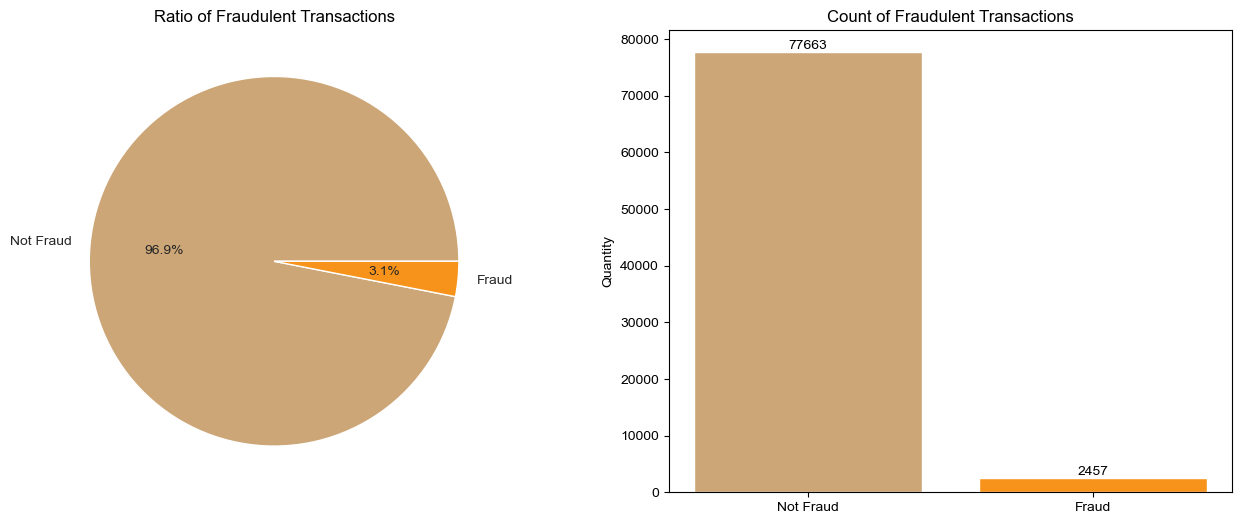

In [10]:
possible_fraud = df['is_possible_fraud'].value_counts()
labels = ["Not Fraud", "Fraud"]

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Pie plot
sns.set_style("whitegrid")
axes[0].pie(possible_fraud, labels=labels, autopct='%1.1f%%', colors=custom_colors)
axes[0].set_title('Ratio of Fraudulent Transactions')

# Bar plot
bars = axes[1].bar(labels, possible_fraud, color=custom_colors)
axes[1].bar(labels, possible_fraud, color=custom_colors)
axes[1].set_title('Count of Fraudulent Transactions')
axes[1].set_ylabel('Quantity')
axes[1].grid(visible=False)

# Quantity Labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        (bar.get_x() + bar.get_width() / 2), 
        height,                            
        f'{height}',
        ha='center', 
        va='bottom', 
        fontsize=10, 
        color='black'
    )

plt.show()

#### Value of Fraudulent transactions

In [12]:
fraud_tx = df[df["is_possible_fraud"] == 1]

print("Count of Fraud TX:", fraud_tx.shape[0])
print("Value of Fraud in dataset: $", round(fraud_tx["price_tx_usd"].sum(), 2))

Count of Fraud TX: 2457
Value of Fraud in dataset: $ 19936914.61


#### Quantity of Transactions

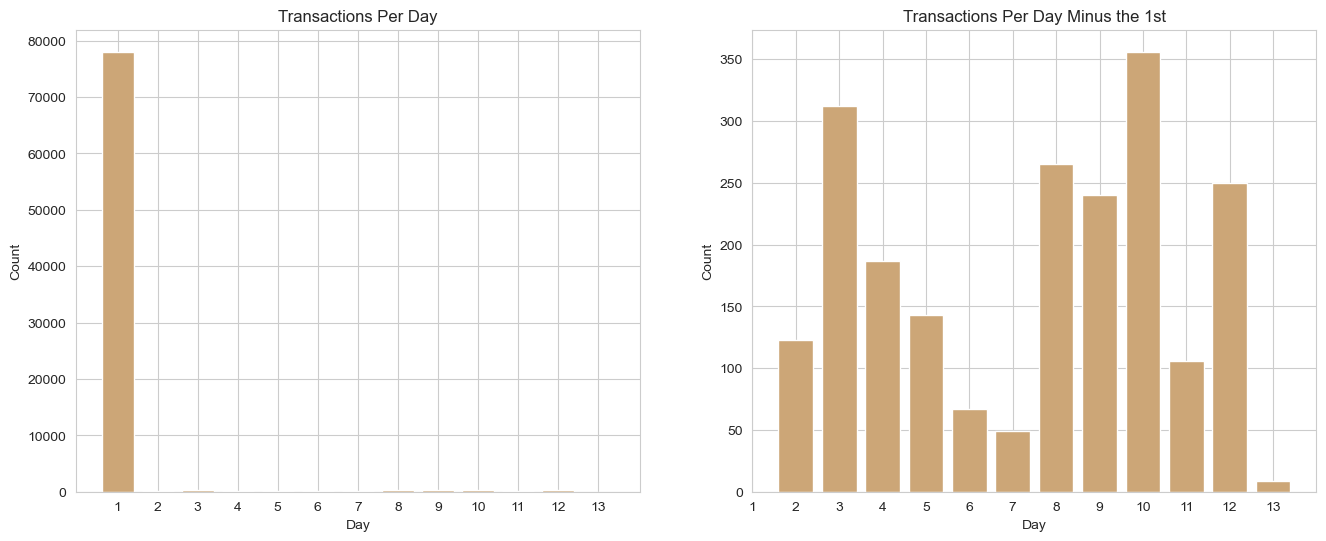

In [14]:
# Graph quantity of transactions
tx_by_day = df['day'].value_counts().sort_index()
tx_by_day_less_1st = tx_by_day[tx_by_day.index != 1]

sns.set_style("whitegrid")

x_ticks = [n for n in range(1,14)]
fig, axes = plt.subplots(1,2, figsize=(16,6))

axes[0].bar(tx_by_day.index, tx_by_day.values, color=custom_colors[0])
axes[0].set_title('Transactions Per Day')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Day')
axes[0].set_xticks(x_ticks)

axes[1].bar(tx_by_day_less_1st.index, tx_by_day_less_1st.values, color=custom_colors[0])
axes[1].set_title('Transactions Per Day Minus the 1st')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Day')
axes[1].set_xticks(x_ticks)

plt.show()

<Axes: title={'center': 'Fraudulent Transactions Per Day'}, xlabel='Day', ylabel='Quantity of Transactions'>

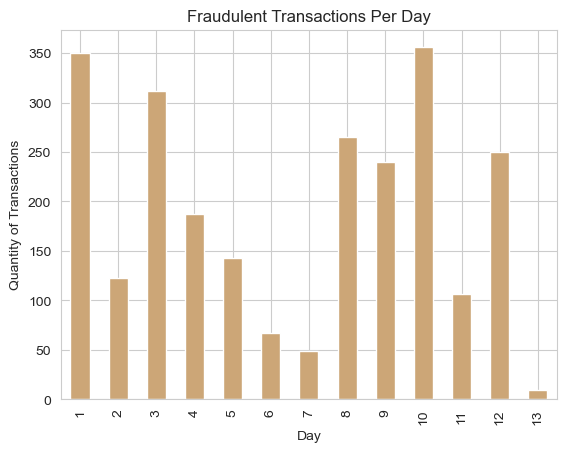

In [15]:
# Graph quantity fraudulent transactions in dataset 
fraud_tx = df[df['is_possible_fraud'] == 1]
fraud_tx = fraud_tx['day'].value_counts().sort_index()

fraud_tx.plot(
    kind='bar',
    title='Fraudulent Transactions Per Day',
    xlabel='Day',
    ylabel='Quantity of Transactions',
    color=custom_colors[0]
)

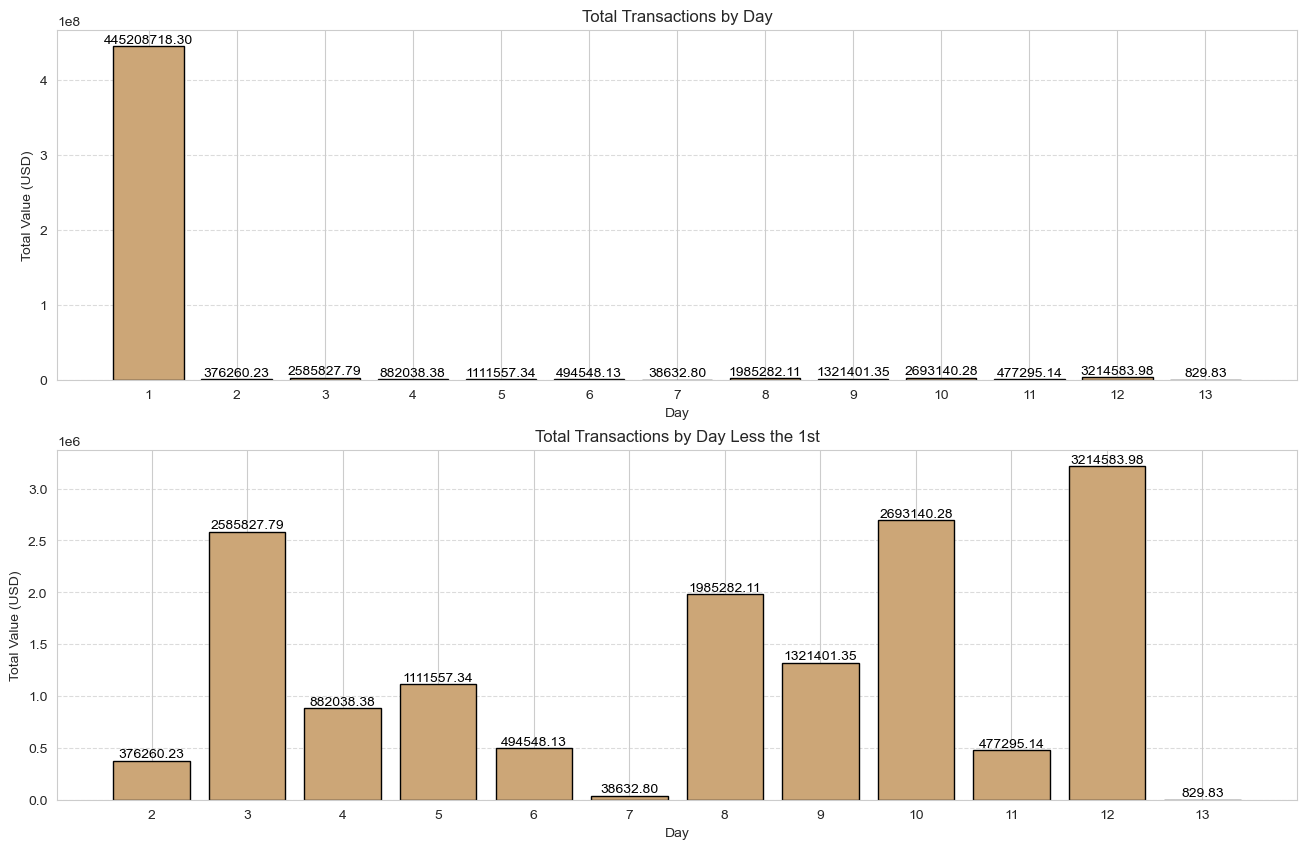

In [16]:
# Graph volume (Value in USD of transactions)
tx_value = df.groupby('day')['price_tx_usd'].sum()

def print_bar_values(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # find method to add commas and dollar sign
            height,                             
            f'{height:.2f}',                    
            ha='center',                        
            va='bottom',                        
            fontsize=10,                        
            color='black'                       
        )

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

bars = axes[0].bar(tx_value.index, tx_value.values, color=custom_colors[0], edgecolor='black')
axes[0].set_title('Total Transactions by Day')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Total Value (USD)')
axes[0].set_xticks(x_ticks)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
print_bar_values(axes[0], bars)

tx_value = tx_value[tx_value.index != 1]

bars = axes[1].bar(tx_value.index, tx_value.values, color=custom_colors[0], edgecolor='black')
axes[1].set_title('Total Transactions by Day Less the 1st')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Total Value (USD)')
axes[1].set_xticks(tx_value.index)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
print_bar_values(axes[1], bars)

plt.show()

In [37]:
tx_value.describe()

count    1.200000e+01
mean     1.265116e+06
std      1.103024e+06
min      8.298277e+02
25%      4.520364e+05
50%      9.967979e+05
75%      2.135419e+06
max      3.214584e+06
Name: price_tx_usd, dtype: float64

In [41]:
tx_value.mean()

1265116.444891928

#### Transactions statistics

count     80120.000000
mean       5746.257060
std       27651.794181
min           0.007449
25%           0.814379
50%          14.248753
75%         423.989014
max      575776.491667
Name: price_tx_usd, dtype: float64 



Text(0.5, 1.0, 'Value Distribution of Transactions')

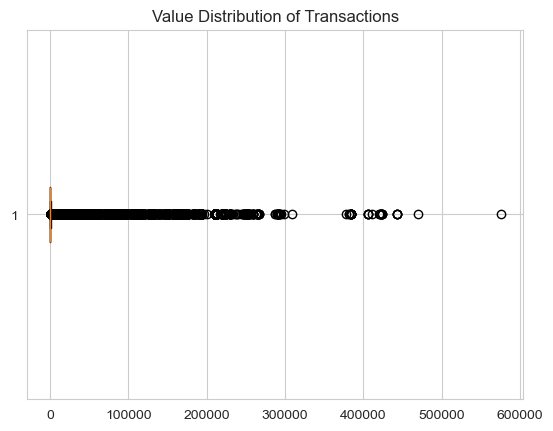

In [18]:
# Print statistics to use for chart in presentation
print(df['price_tx_usd'].describe(), "\n")

# Boxplot 
plt.boxplot(df['price_tx_usd'], vert=False, autorange=True)
plt.title("Value Distribution of Transactions")